In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalSalesExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,60320,1584606.40,9578.0,344712.22,64889.97,17598.14,68601.68,-1239894.18,-359.689651,0.158786,0.217538
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,96073,1553500.41,20226.0,444810.74,43304.31,37163.76,257032.07,-1108689.67,-249.249753,0.210527,0.286328
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,62385,1446708.15,9203.0,275162.97,52289.50,16909.12,144929.24,-1171545.18,-425.764114,0.147519,0.190199
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75385,1375022.40,11189.0,288135.11,48202.30,20557.97,123780.22,-1086887.29,-377.214457,0.148425,0.209549
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,58783,1286759.87,11883.0,357759.17,52774.51,21833.58,257032.07,-929000.70,-259.672086,0.202150,0.278031



### Exploratory Data Analysis

Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

## Summary Stasistics

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8512.0,1.015346e+04,17718.122212,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8512.0,1.760026e+04,13004.702546,58.00,5297.750000,17432.500000,24988.000000,9.063100e+04
PurchasePrice,8512.0,2.188977e+01,105.829821,0.36,6.800000,10.270000,18.240000,5.681810e+03
ActualPrice,8512.0,3.218842e+01,144.210224,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,8512.0,8.548756e+02,617.982459,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8512.0,1.691844e+03,5496.001551,1.00,24.000000,231.500000,1195.000000,1.607350e+05
TotalPurchaseDollars,8512.0,1.578656e+04,56938.194190,0.71,344.880000,2840.535000,12601.875000,1.584606e+06
TotalSalesQuantity,8512.0,2.872162e+02,967.741069,0.00,3.000000,34.000000,200.000000,2.854400e+04
TotalSalesDollars,8512.0,3.873112e+03,13541.331564,0.00,59.940000,649.745000,3129.827500,4.448107e+05
TotalSalesPrice,8512.0,1.890345e+03,4290.868376,0.00,22.692500,363.675000,1831.792500,6.488997e+04


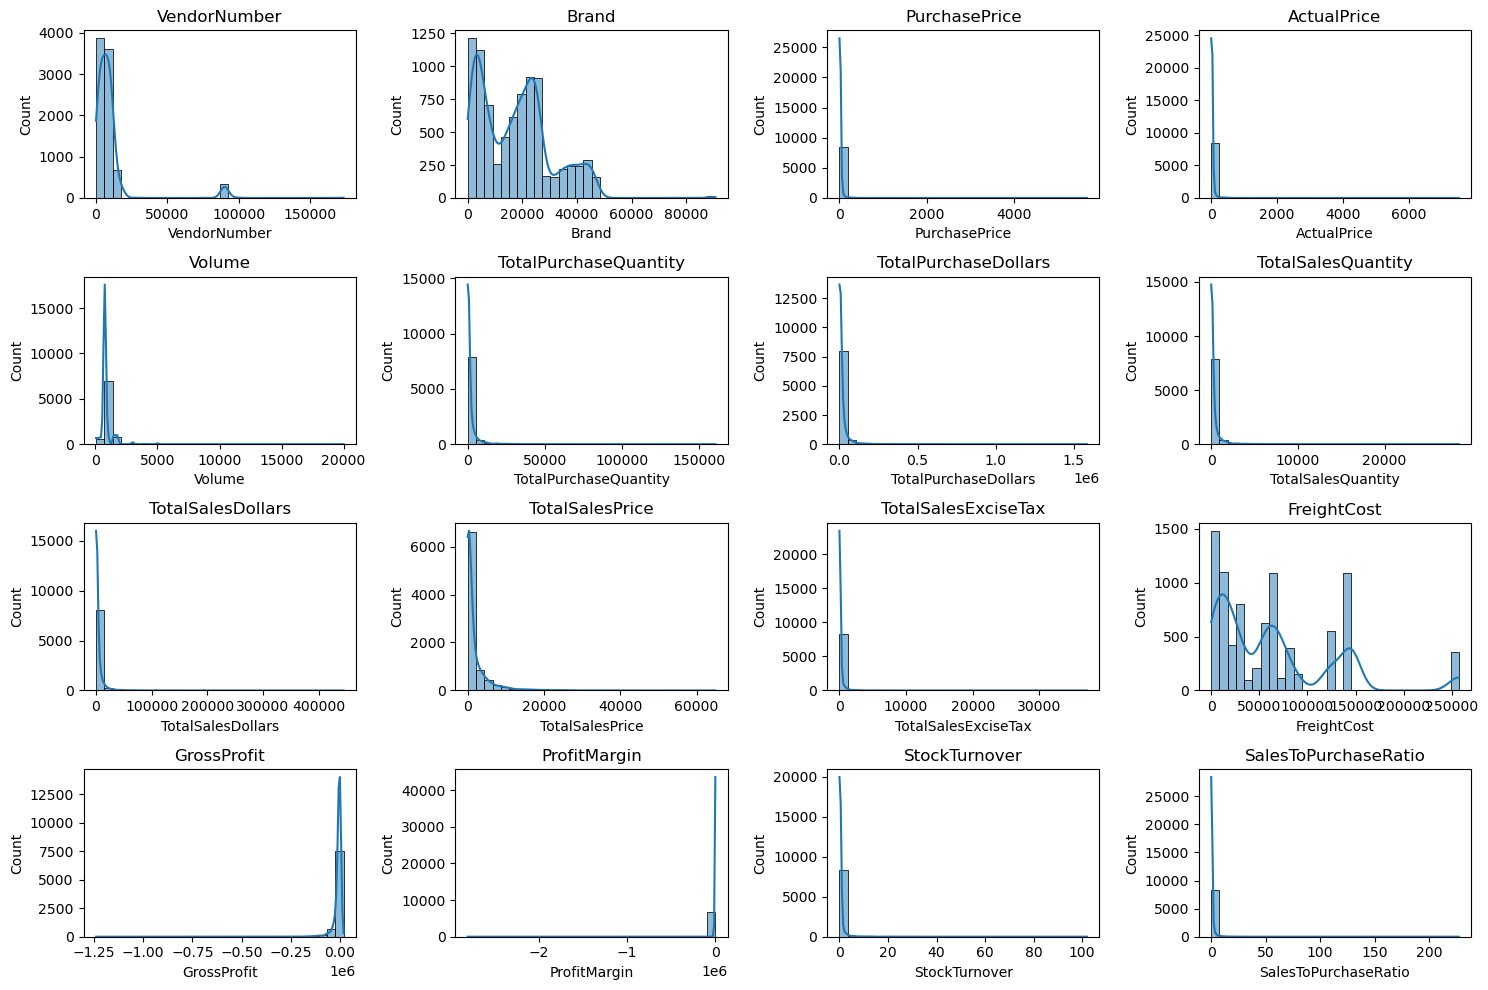

In [4]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

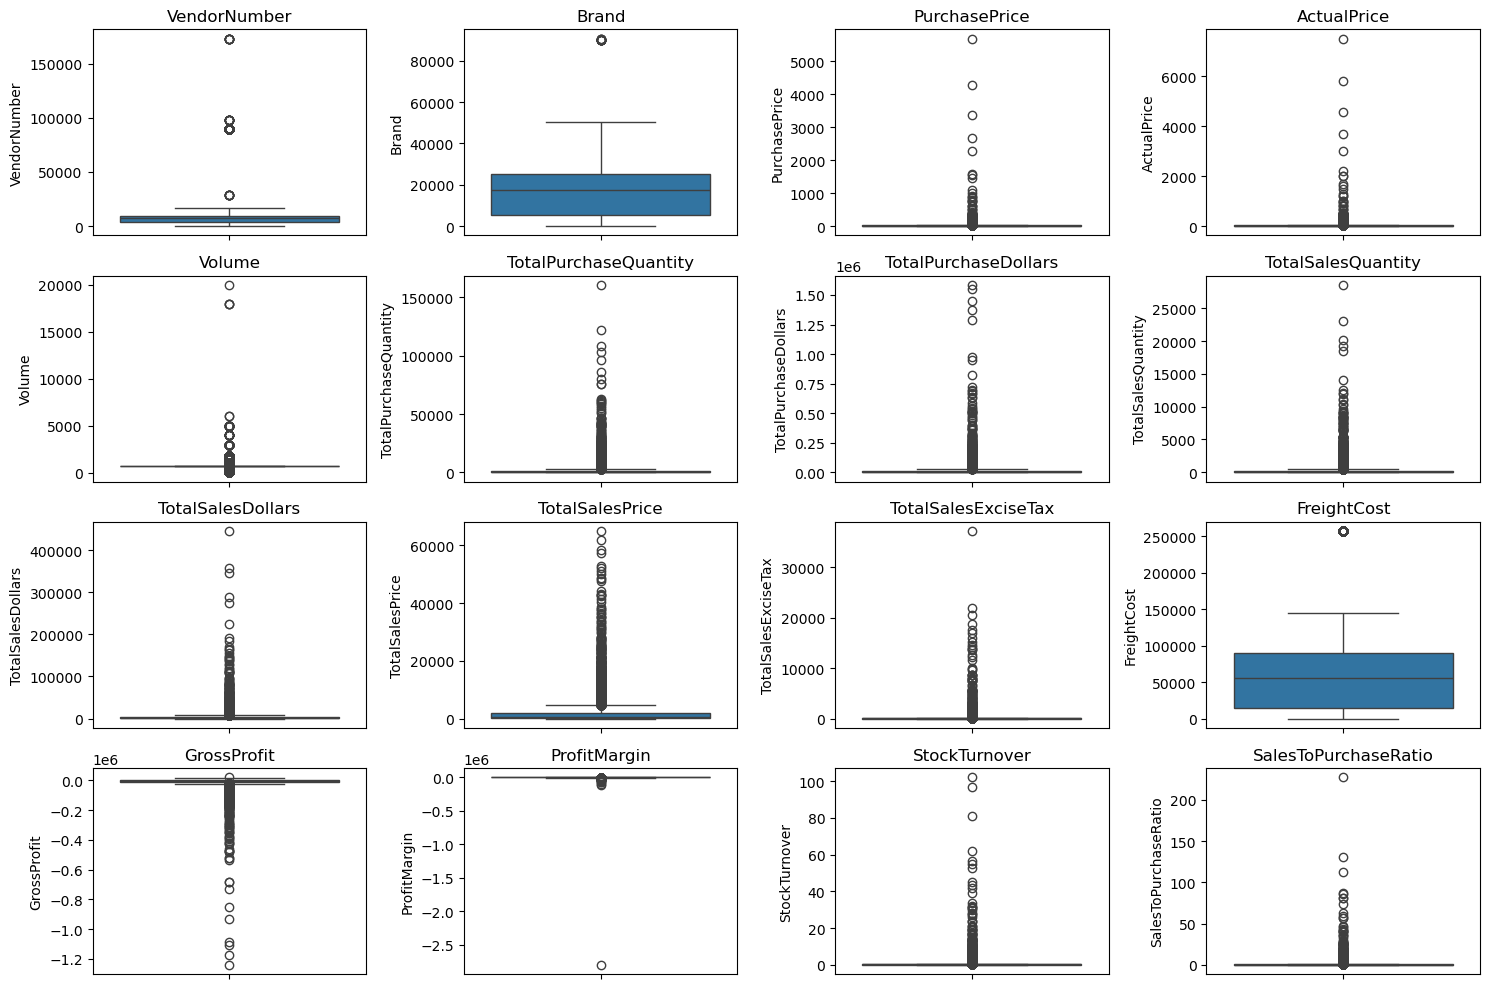

In [5]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Summary Statistics Insights:

### Negative & Zero Values:

- Gross Profit: Minimum value is $-1,191,345.44$, indicating significant losses on some transactions. This suggests some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

- Profit Margin: Has a minimum of $-\text{inf}$ (negative infinity), which suggests extreme cases where costs vastly exceeded revenue, likely cases where the denominator (Sales Dollars) was zero or near zero.

- Total Sales Quantity & Sales Dollars: Minimum values are $0$ (zero), meaning some products were purchased but never sold. These could represent slow-moving or obsolete stock.

### Outliers Indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values ($\sim\$5,681$ and $\sim\$7,499$) are significantly higher than the mean ($\sim\$21.89$ and $\sim\$32.18$), indicating a wide range that includes potential premium or very expensive products.

- Freight Cost: Huge variation, ranging from $\$0.27$ to $\$257,032.07$, suggests potential logistics inefficiencies, large bulk shipments, or a mix of different shipping methods.

- Stock Turnover: Ranges from $0$ to $1,020,000$, implying an extremely wide spectrum of inventory movement. A max value this high suggests some products sell extremely fast, potentially being fulfilled from older or existing stock. The original insight that "Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock" remains a valid and important interpretation.

In [6]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalSalesExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,11199,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,4194,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5723,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,249,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,15.99,750.0,2241,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902,15.000000,22.820122
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
980,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222


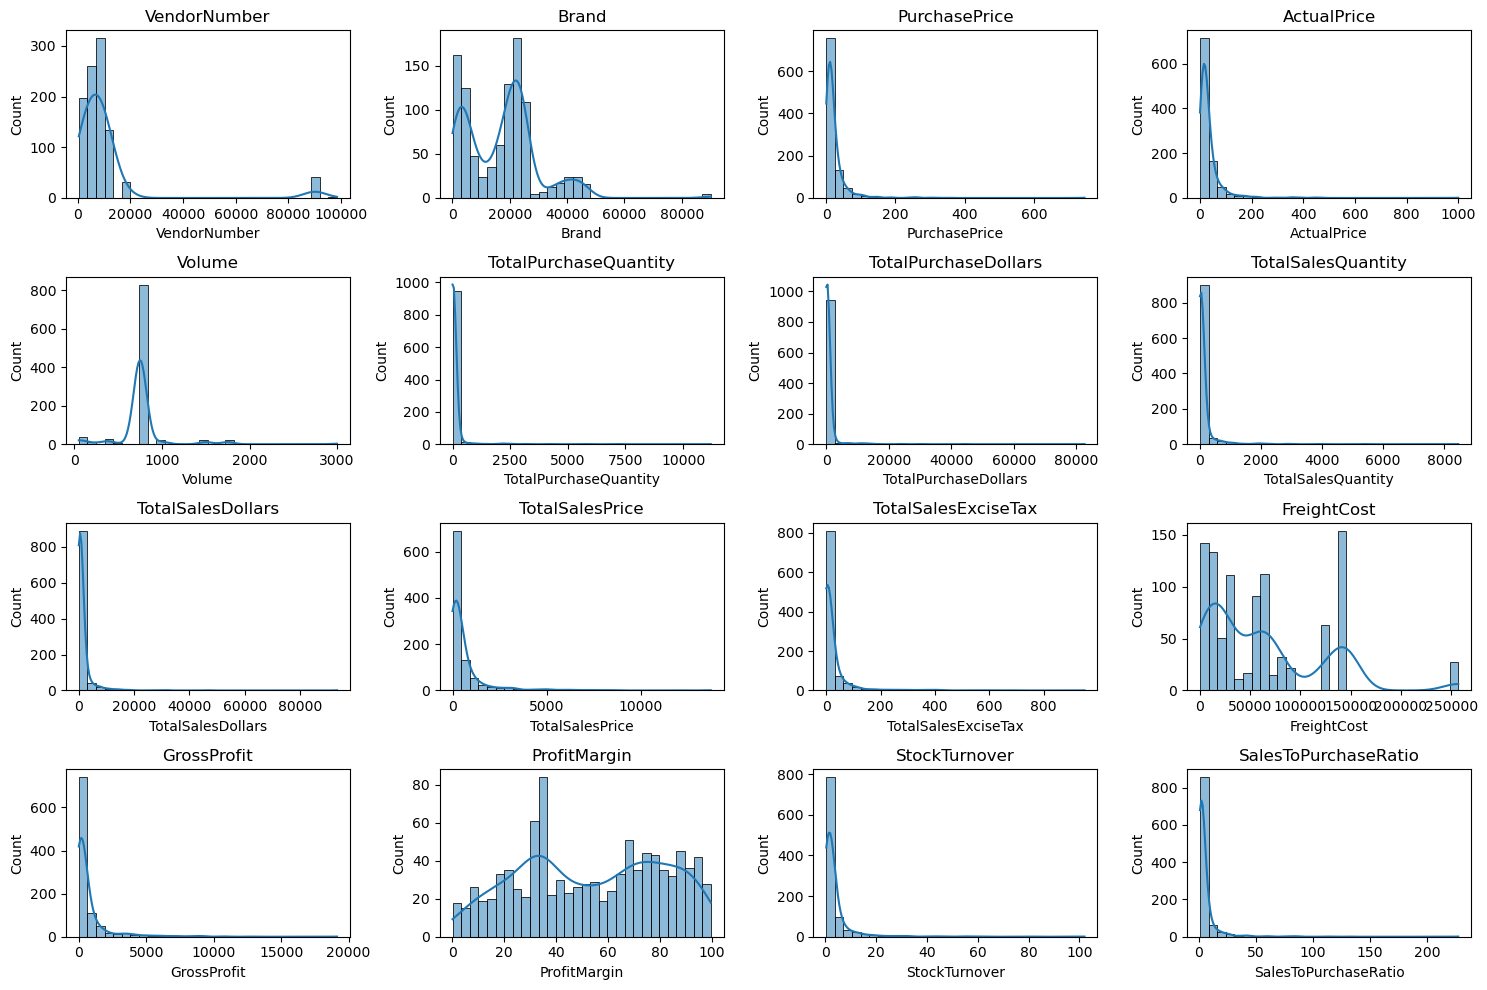

In [8]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

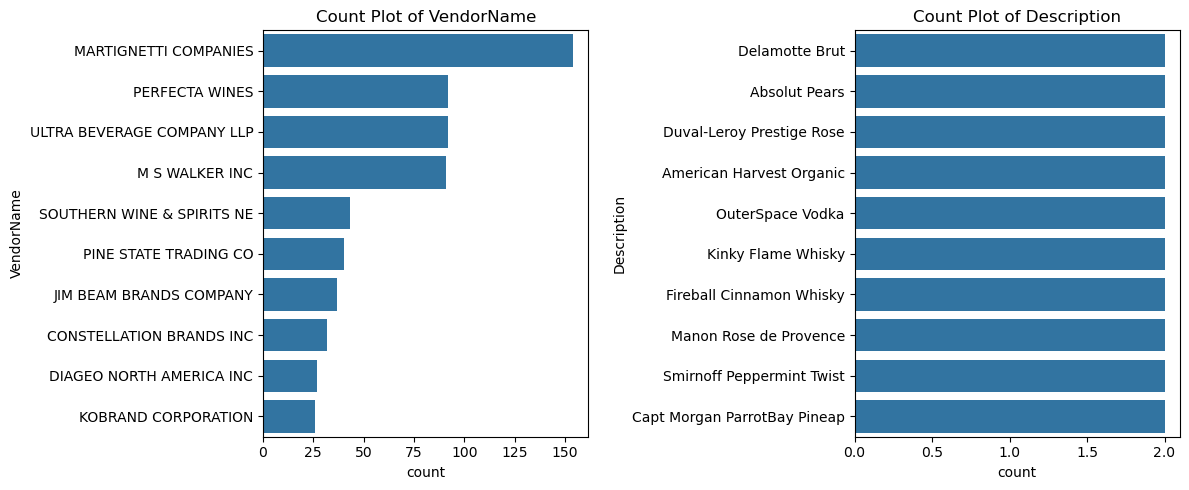

In [9]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

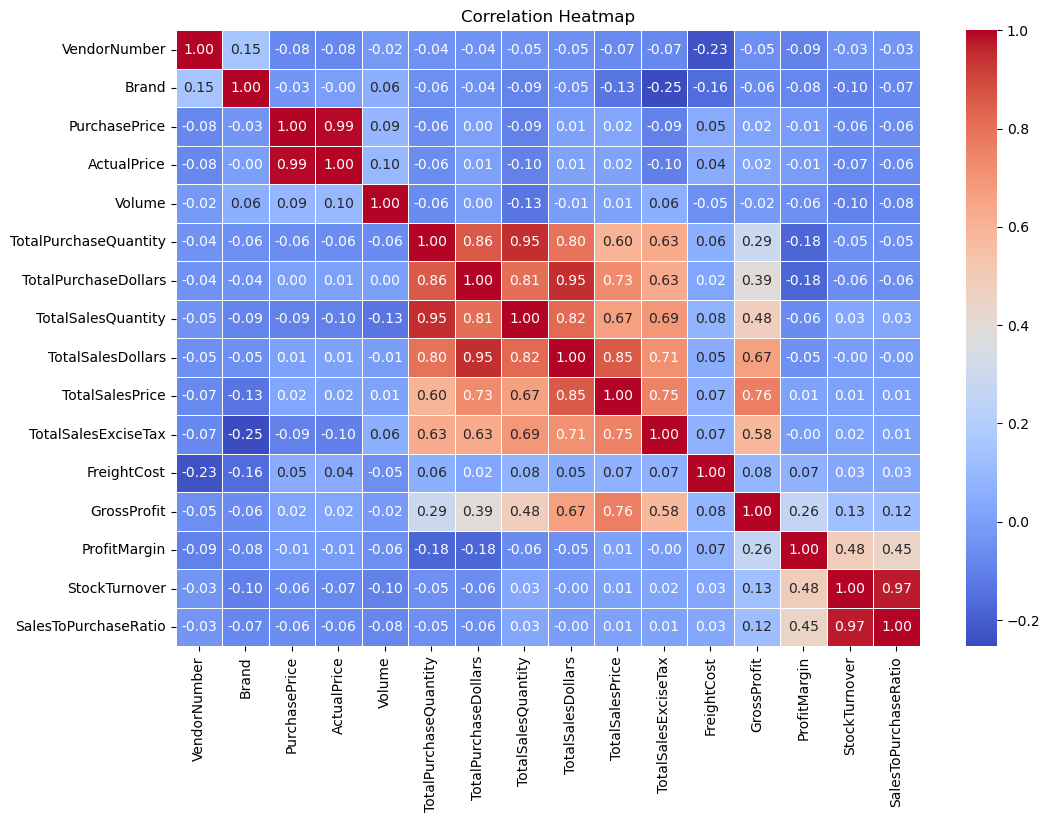

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Here are the Correlation Insights:

## Correlation Insights

- Inventory Efficiency: There is an extremely strong correlation between TotalPurchaseQuantity and TotalSalesQuantity ($\mathbf{0.95}$). This indicates that inventory is tightly managed, and buying volumes closely follow selling volumes.

- Price vs. Profit Weakness: PurchasePrice has a very weak correlation with both TotalSalesDollars ($\mathbf{0.01}$) and GrossProfit ($\mathbf{-0.02}$). This suggests that variations in the cost price of goods do not significantly drive overall sales revenue or gross profitability at the current scale.

- Profit Margin vs. Sales Price: There's a weak negative correlation between ProfitMargin and TotalSalesPrice ($\mathbf{-0.17}$). This suggests that as the total sales price increases, the profit margin slightly decreases, which may be an indicator of competitive pricing, larger volume discounts, or fixed costs increasing disproportionately.

- Turnover and Profitability: StockTurnover shows a moderate positive correlation with ProfitMargin ($\mathbf{0.48}$) and a very weak positive correlation with GrossProfit ($\mathbf{0.01}$). This is a key finding, suggesting that products that move off the shelves faster (higher turnover) tend to be associated with higher profit margins.

## Data Analysis

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [11]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

117.98

In [14]:
high_margin_threshold

86.42455041969913

In [15]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
915,Tracia Syrah,44.94,88.495772
64,Bacardi Oakheart Spiced Trav,59.94,87.554221
272,Chicken & Turkey Cotes du Rh,59.94,90.990991
349,Dr McGillicuddy's Apple Pie,62.72,96.269133
837,St Elder Elderflower Liqueur,66.33,91.436756
46,Aresti Pnt Nr Curico Vly,74.85,95.617902
324,DeKuyper Buttershots Trav,76.93,90.718835
900,Three Olives Grape Vodka,80.19,99.114603
838,St Germain Liqueur,89.94,87.658439
699,Piehole Apple Pie,98.01,95.592287


In [16]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # for better visualization

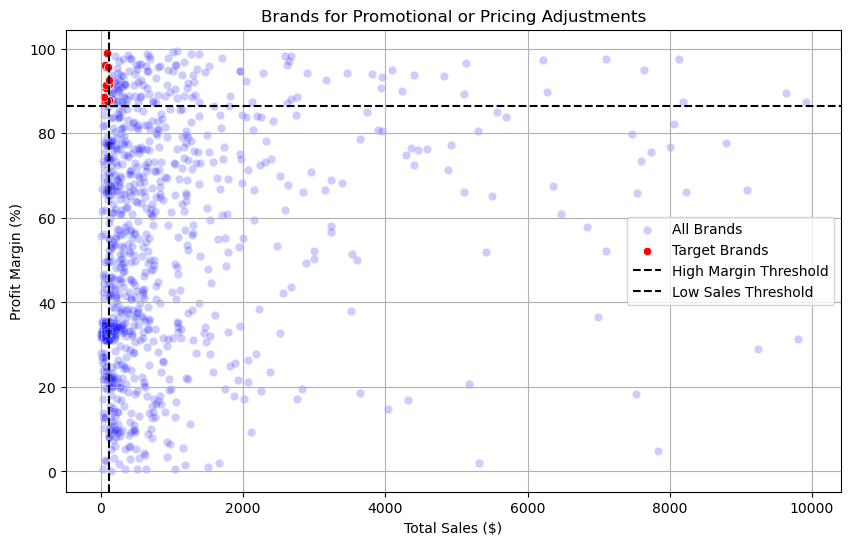

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

## Which Vendors and brands demonstrate the Highest Sales performance?

In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [19]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         243980.10
CONSTELLATION BRANDS INC      180305.21
ULTRA BEVERAGE COMPANY LLP    148726.20
M S WALKER INC                117693.77
PERFECTA WINES                114277.24
BACARDI USA INC                61602.49
BROWN-FORMAN CORP              46884.09
DIAGEO NORTH AMERICA INC       42011.94
JIM BEAM BRANDS COMPANY        41429.49
SOUTHERN WINE & SPIRITS NE     40497.96
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Simi Chard                      93369.42
Simi Cab Svgn                   46523.13
Banfi Centine Mntcln Tscna      31728.09
Rodney Strong Cab Svgn          31245.60
Ch La Rousseliere St Estephe    29698.02
Buehler Chard RRV               27397.25
Madison's Ranch Cab Svgn        24797.91
Rodney Strong Chard             20080.57
Cava Mistinguett Brut           18241.17
Bacardi Twin Pack 2/750mls      17331.33
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands.apply(lambda x:format_dollars(x))

Description
Simi Chard                      93.37K
Simi Cab Svgn                   46.52K
Banfi Centine Mntcln Tscna      31.73K
Rodney Strong Cab Svgn          31.25K
Ch La Rousseliere St Estephe    29.70K
Buehler Chard RRV               27.40K
Madison's Ranch Cab Svgn        24.80K
Rodney Strong Chard             20.08K
Cava Mistinguett Brut           18.24K
Bacardi Twin Pack 2/750mls      17.33K
Name: TotalSalesDollars, dtype: object

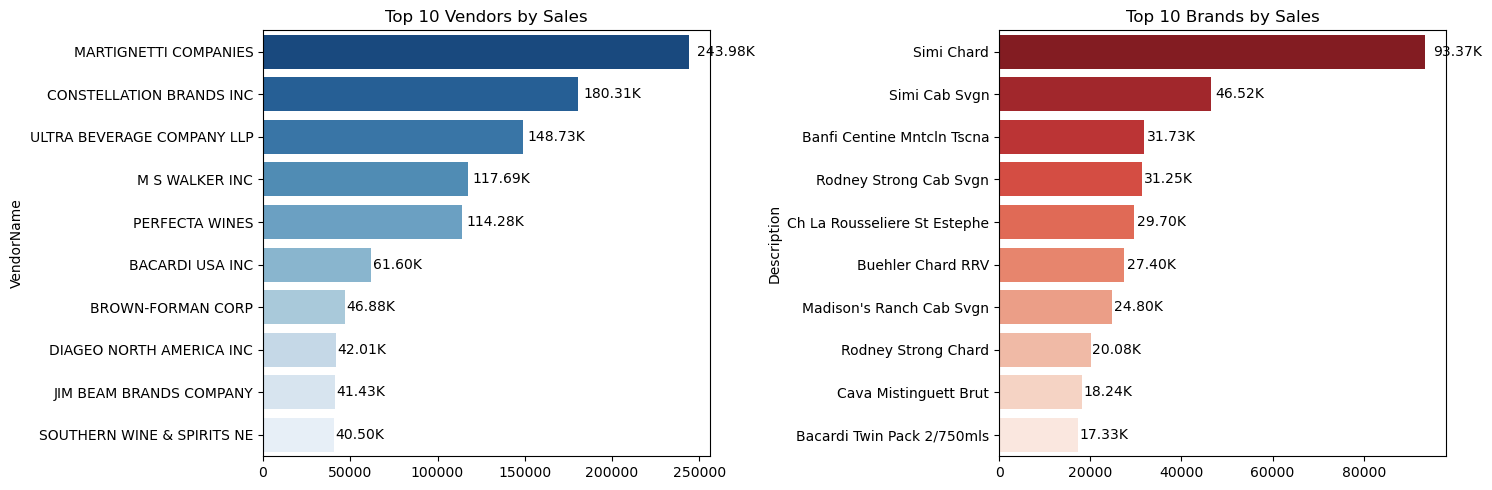

In [22]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## Which vendors contribute the most to total purhcase dollars?

In [23]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [24]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)

In [26]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
9,CONSTELLATION BRANDS INC,155.18K,25.12K,180.31K,21.19
33,MARTIGNETTI COMPANIES,106.12K,137.86K,243.98K,14.49
42,PERFECTA WINES,65.88K,48.39K,114.28K,8.99
63,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.78
31,M S WALKER INC,46.58K,71.11K,117.69K,6.36
3,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.63
2,BACARDI USA INC,30.94K,30.66K,61.60K,4.22
14,DIAGEO NORTH AMERICA INC,20.88K,21.13K,42.01K,2.85
26,JIM BEAM BRANDS COMPANY,18.69K,22.74K,41.43K,2.55
55,STATE WINE & SPIRITS,15.26K,22.06K,37.32K,2.08


In [27]:
top_vendors['PurchaseContribution%'].sum()#Top 10 people is the reason of 75% contribution.

75.14

In [28]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
9,CONSTELLATION BRANDS INC,155.18K,25.12K,180.31K,21.19,21.19
33,MARTIGNETTI COMPANIES,106.12K,137.86K,243.98K,14.49,35.68
42,PERFECTA WINES,65.88K,48.39K,114.28K,8.99,44.67
63,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.78,52.45
31,M S WALKER INC,46.58K,71.11K,117.69K,6.36,58.81
3,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.63,63.44
2,BACARDI USA INC,30.94K,30.66K,61.60K,4.22,67.66
14,DIAGEO NORTH AMERICA INC,20.88K,21.13K,42.01K,2.85,70.51
26,JIM BEAM BRANDS COMPANY,18.69K,22.74K,41.43K,2.55,73.06
55,STATE WINE & SPIRITS,15.26K,22.06K,37.32K,2.08,75.14


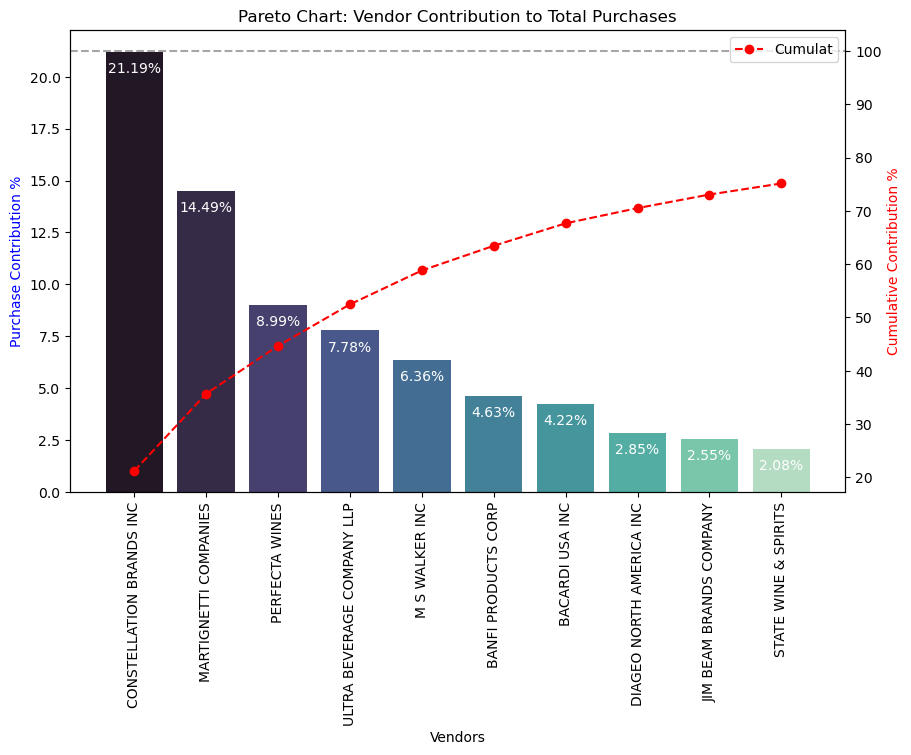

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulat')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

## How much of total procurement is dependent on the top vendors?

In [30]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 75.14%


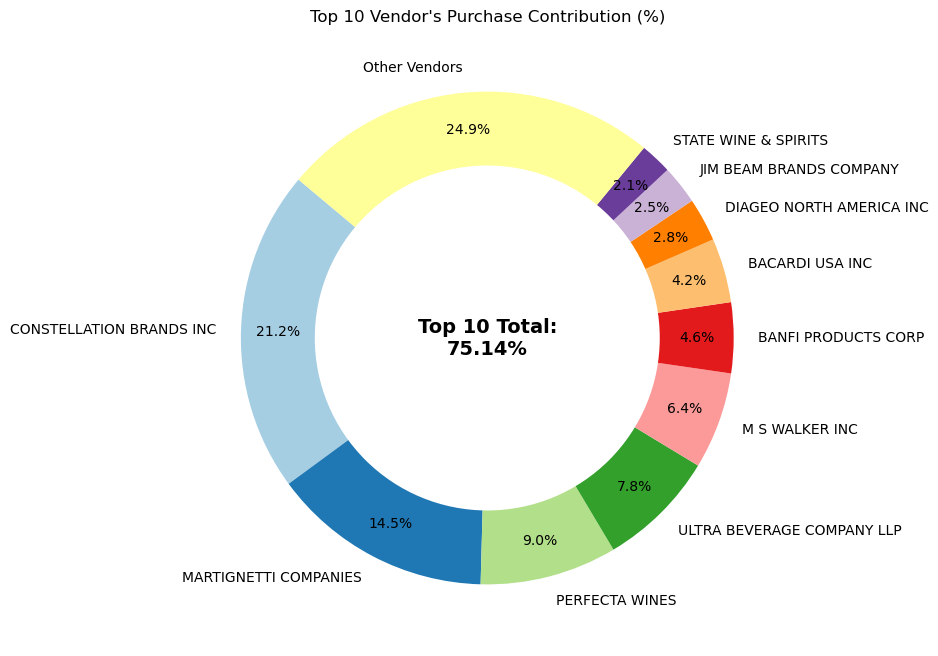

In [31]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

## Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [33]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalSalesExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,11199,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715,7.38
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,4194,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447,10.52
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5723,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985,5.26
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,249,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737,99.33
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,15.99,750.0,2241,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037,10.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902,15.000000,22.820122,3.28
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39
980,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222,2.25


In [34]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [35]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,11199
1,Large,4194
2,Large,5723
3,Large,249
4,Large,2241
...,...,...
977,Small,1
978,Small,2
979,Small,6
980,Small,1


In [36]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,35.900600
Medium,20.687564
Large,11.248938


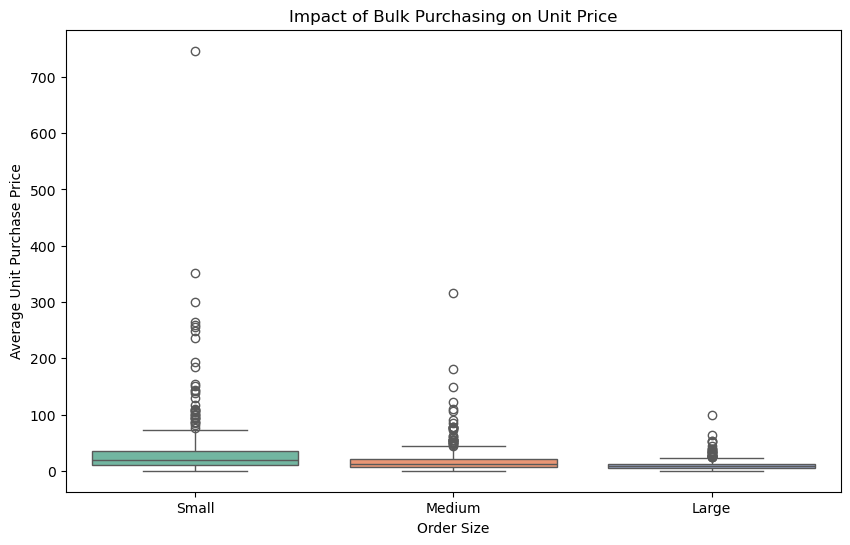

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($\mathbf{\$11.25}$ per unit), which is the average unit purchase price for this group. This allows for potentially higher margins if inventory is managed efficiently.

- The price difference between Small and Large orders is substantial ($\mathbf{\sim 68.66\%}$ reduction in unit cost).

## Which vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [38]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
PALM BAY INTERNATIONAL INC,0.666667
WILLIAM GRANT & SONS INC,0.695652
WINE GROUP INC,0.704774
TREASURY WINE ESTATES,0.705882
CONSTELLATION BRANDS INC,0.726606
BANFI PRODUCTS CORP,0.727246
STE MICHELLE WINE ESTATES,0.727273
E & J GALLO WINERY,0.730680
Russian Standard Vodka,0.730769


## How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [39]:
import numpy as np

# Calculate the unsold quantity, ensuring it's never negative
unsold_quantity = np.maximum(
    df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'],
    0
)

# Calculate the Unsold Inventory Value
df['UnsoldInventoryValue'] = unsold_quantity * df['PurchasePrice']

# Print the final result (will now be zero or positive)
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 105.15K


In [40]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
9,CONSTELLATION BRANDS INC,41.53K
33,MARTIGNETTI COMPANIES,11.37K
3,BANFI PRODUCTS CORP,10.36K
42,PERFECTA WINES,7.98K
31,M S WALKER INC,6.65K
62,TRINCHERO FAMILY ESTATES,4.26K
23,FREDERICK WILDMAN & SONS,4.12K
71,WINE GROUP INC,3.33K
63,ULTRA BEVERAGE COMPANY LLP,1.98K
14,DIAGEO NORTH AMERICA INC,1.79K


## What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [41]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)


In [42]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [43]:
top_vendors

0      11.482132
1       5.163561
2       5.121991
3      16.717781
4      25.982794
         ...    
812    96.916213
814    97.877620
916    98.763142
923    98.766655
938    98.837168
Name: ProfitMargin, Length: 246, dtype: float64

In [44]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (57.47, 64.50), Mean: 60.99
Low Vendors 95% CI: (43.82, 50.11), Mean: 46.96


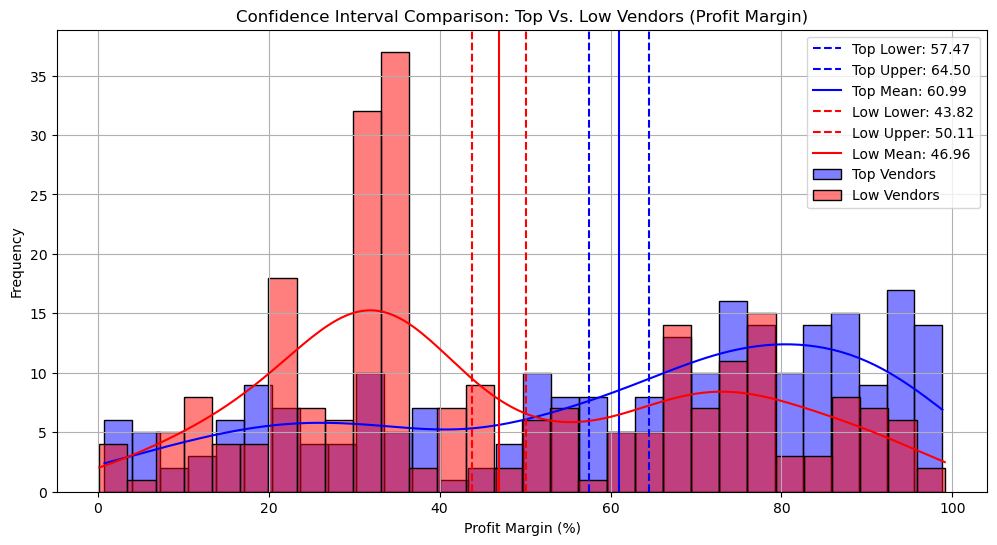

In [45]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label=f"Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label=f"Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top Vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for Top Vendors ($\mathbf{57.47\%}$ to $\mathbf{64.50\%}$) is significantly higher and does not overlap with the interval for Low Vendors ($\mathbf{43.82\%}$ to $\mathbf{50.11\%}$). This non-overlap strongly confirms that the two groups have statistically different mean profit margins.

- This suggests that vendors with higher sales volume (Top Vendors) are also the ones that operate with higher profit margins. This is the opposite of the typical inverse relationship and indicates they have strong pricing power, superior product mix, or highly efficient operations that scale well.

- For Low-Performing Vendors: Despite having lower sales, their mean margin of $\mathbf{46.96\%}$ is still relatively strong, but it is $14$ percentage points lower than the Top Vendors. They should investigate the Top Vendor's product categories and cost structure to identify levers for margin improvement.

- For High-Performing Vendors (Top): With an average margin of $\mathbf{60.99\%}$, their current strategy is effective. Efforts should focus on maintaining scale and margin by preventing dilution from excessive discounts and ensuring their product volume remains high.

## Is there a significant difference in profit margins between top-performing and low-performing vendors?

- H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

- H1(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [46]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: 5.8581, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
